In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import tensorflow as tf
import os

In [ ]:
base_dir = '/gdrive/MyDrive/Dataset/BUNGA'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/gdrive/MyDrive/Dataset/BUNGA/val')

['astilbe', 'calendula']

In [ ]:
os.listdir('/gdrive/MyDrive/Dataset/BUNGA/val')

['astilbe', 'calendula']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 1141 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# latih model dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=15,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20


15/15 - 15s - loss: 0.2329 - accuracy: 0.9333 - val_loss: 0.1006 - val_accuracy: 1.0000 - 15s/epoch - 993ms/step
Epoch 2/20
15/15 - 14s - loss: 0.4741 - accuracy: 0.8333 - 14s/epoch - 959ms/step
Epoch 3/20
15/15 - 17s - loss: 0.3729 - accuracy: 0.8667 - 17s/epoch - 1s/step
Epoch 4/20
15/15 - 14s - loss: 0.3418 - accuracy: 0.8333 - 14s/epoch - 956ms/step
Epoch 5/20
15/15 - 14s - loss: 0.2504 - accuracy: 0.9667 - 14s/epoch - 961ms/step
Epoch 6/20
15/15 - 12s - loss: 0.5270 - accuracy: 0.8500 - 12s/epoch - 800ms/step
Epoch 7/20
15/15 - 13s - loss: 0.2920 - accuracy: 0.9167 - 13s/epoch - 871ms/step
Epoch 8/20
15/15 - 10s - loss: 0.3245 - accuracy: 0.8833 - 10s/epoch - 659ms/step
Epoch 9/20
15/15 - 11s - loss: 0.2043 - accuracy: 0.9500 - 11s/epoch - 756ms/step
Epoch 10/20
15/15 - 10s - loss: 0.1343 - accuracy: 0.9500 - 10s/epoch - 687ms/step
Epoch 11/20
15/15 - 11s - loss: 0.0441 - accuracy: 0.9833 - 11s/epoch - 715ms/step
Epoch 12/20
15/15 - 9s - loss: 0.0881 - accuracy: 0.9833 - 9s/epoch 

Saving 03.jpg to 03.jpg
1/1 [==============================] - 0s 72ms/step
03.jpg
calendula


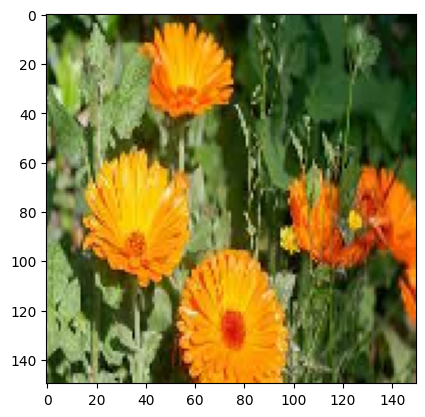

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('astilbe')
  else:
   print('calendula')